# Proyek Pertama: Predictive Analytics
Sumber data: [Lung cancer dataset](https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link)

## Data Understanding

Deskripsi Dataset  
Berdasarkan informasi dari kaggle, berikut adalah uraian mengenai setiap kolom yang terdapat dalam data:

| Nama Kolom                    | Deskripsi                                                  |
|-------------------------------|------------------------------------------------------------|
| Age                           | Usia pasien. (Numerik)                                    |
| Gender                        | Jenis kelamin pasien. (Kategorikal)                       |
| Air Pollution                 | Tingkat paparan polusi udara pada pasien. (Kategorikal)   |
| Alcohol use                   | Tingkat penggunaan alkohol oleh pasien. (Kategorikal)     |
| Dust Allergy                  | Tingkat alergi debu pada pasien. (Kategorikal)            |
| OccuPational Hazards          | Tingkat bahaya pekerjaan pada pasien. (Kategorikal)       |
| Genetic Risk                  | Tingkat risiko genetik pada pasien. (Kategorikal)         |
| chronic Lung Disease          | Tingkat penyakit paru kronis pada pasien. (Kategorikal)   |
| Balanced Diet                 | Tingkat pola makan seimbang pasien. (Kategorikal)         |
| Obesity                       | Tingkat obesitas pasien. (Kategorikal)                    |
| Smoking                       | Tingkat merokok oleh pasien. (Kategorikal)                |
| Passive Smoker                | Tingkat paparan asap rokok pasif pada pasien. (Kategorikal)|
| Chest Pain                    | Tingkat nyeri dada pada pasien. (Kategorikal)             |
| Coughing of Blood             | Tingkat batuk berdarah pada pasien. (Kategorikal)         |
| Fatigue                       | Tingkat kelelahan pada pasien. (Kategorikal)              |
| Weight Loss                   | Tingkat penurunan berat badan pada pasien. (Kategorikal)  |
| Shortness of Breath           | Tingkat sesak napas pada pasien. (Kategorikal)            |
| Wheezing                      | Tingkat mengi pada pasien. (Kategorikal)                  |
| Swallowing Difficulty         | Tingkat kesulitan menelan pada pasien. (Kategorikal)      |
| Clubbing of Finger Nails      | Tingkat pembengkakan ujung jari pada pasien. (Kategorikal)|


## Data Loading

In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [54]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_plEbzzv09pcAAZuPlWM2gGtPDUbUQF7glP4WE7TrEVMKey5AwStl78hk9rXcIfk7Gc7McchtFKg8/pub?output=csv', index_col='index')

>- Dataset kaggle dipublikasi ulang melalui drive pribadi untuk mempermudah akses
>- Set kolom index agar tidak menjadi features

In [55]:
print(df.head(5))

      Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
index                                                                     
0             P1   33       1              2            4             5   
1            P10   17       1              3            1             5   
2           P100   35       1              4            5             6   
3          P1000   37       1              7            7             7   
4           P101   46       1              6            8             7   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
index                                                             
0                         4             3                     2   
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   

    

In [56]:
df.shape

(1000, 25)

>Dataset ini berisi data sejumlah 1000 pasien

In [57]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


>- Kolom Patient Id bisa dihapus
>- Dataset ini membagi pasien menjadi 3 level, yaitu Low, Medium, dan High

In [58]:
df.drop("Patient Id", axis=1, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                   1000

>Tipe data sudah sesuai

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


In [61]:
df.isnull().sum()

,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0
Balanced Diet,0
Obesity,0


>Tidak ada missing value dalam dataset

## EDA

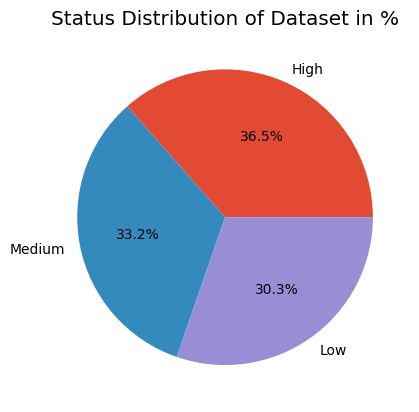

In [62]:
status_distribution = df['Level'].value_counts()

plt.style.use('ggplot')
plt.pie(status_distribution, labels=status_distribution.index, autopct='%2.1f%%')
plt.title('Status Distribution of Dataset in %')
plt.show()

### Label Encoding

In [63]:
print('Cancer Level: ', df['Level'].unique())

Cancer Level:  ['Low' 'Medium' 'High']


In [64]:
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df["Level"].replace(mapping, inplace=True)

print('Cancer Level: ', df['Level'].unique())

Cancer Level:  [0 1 2]


>Encode kolom Level agar menjadi numerik dan dapat divisualisasikan

In [65]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


## Data Visualization

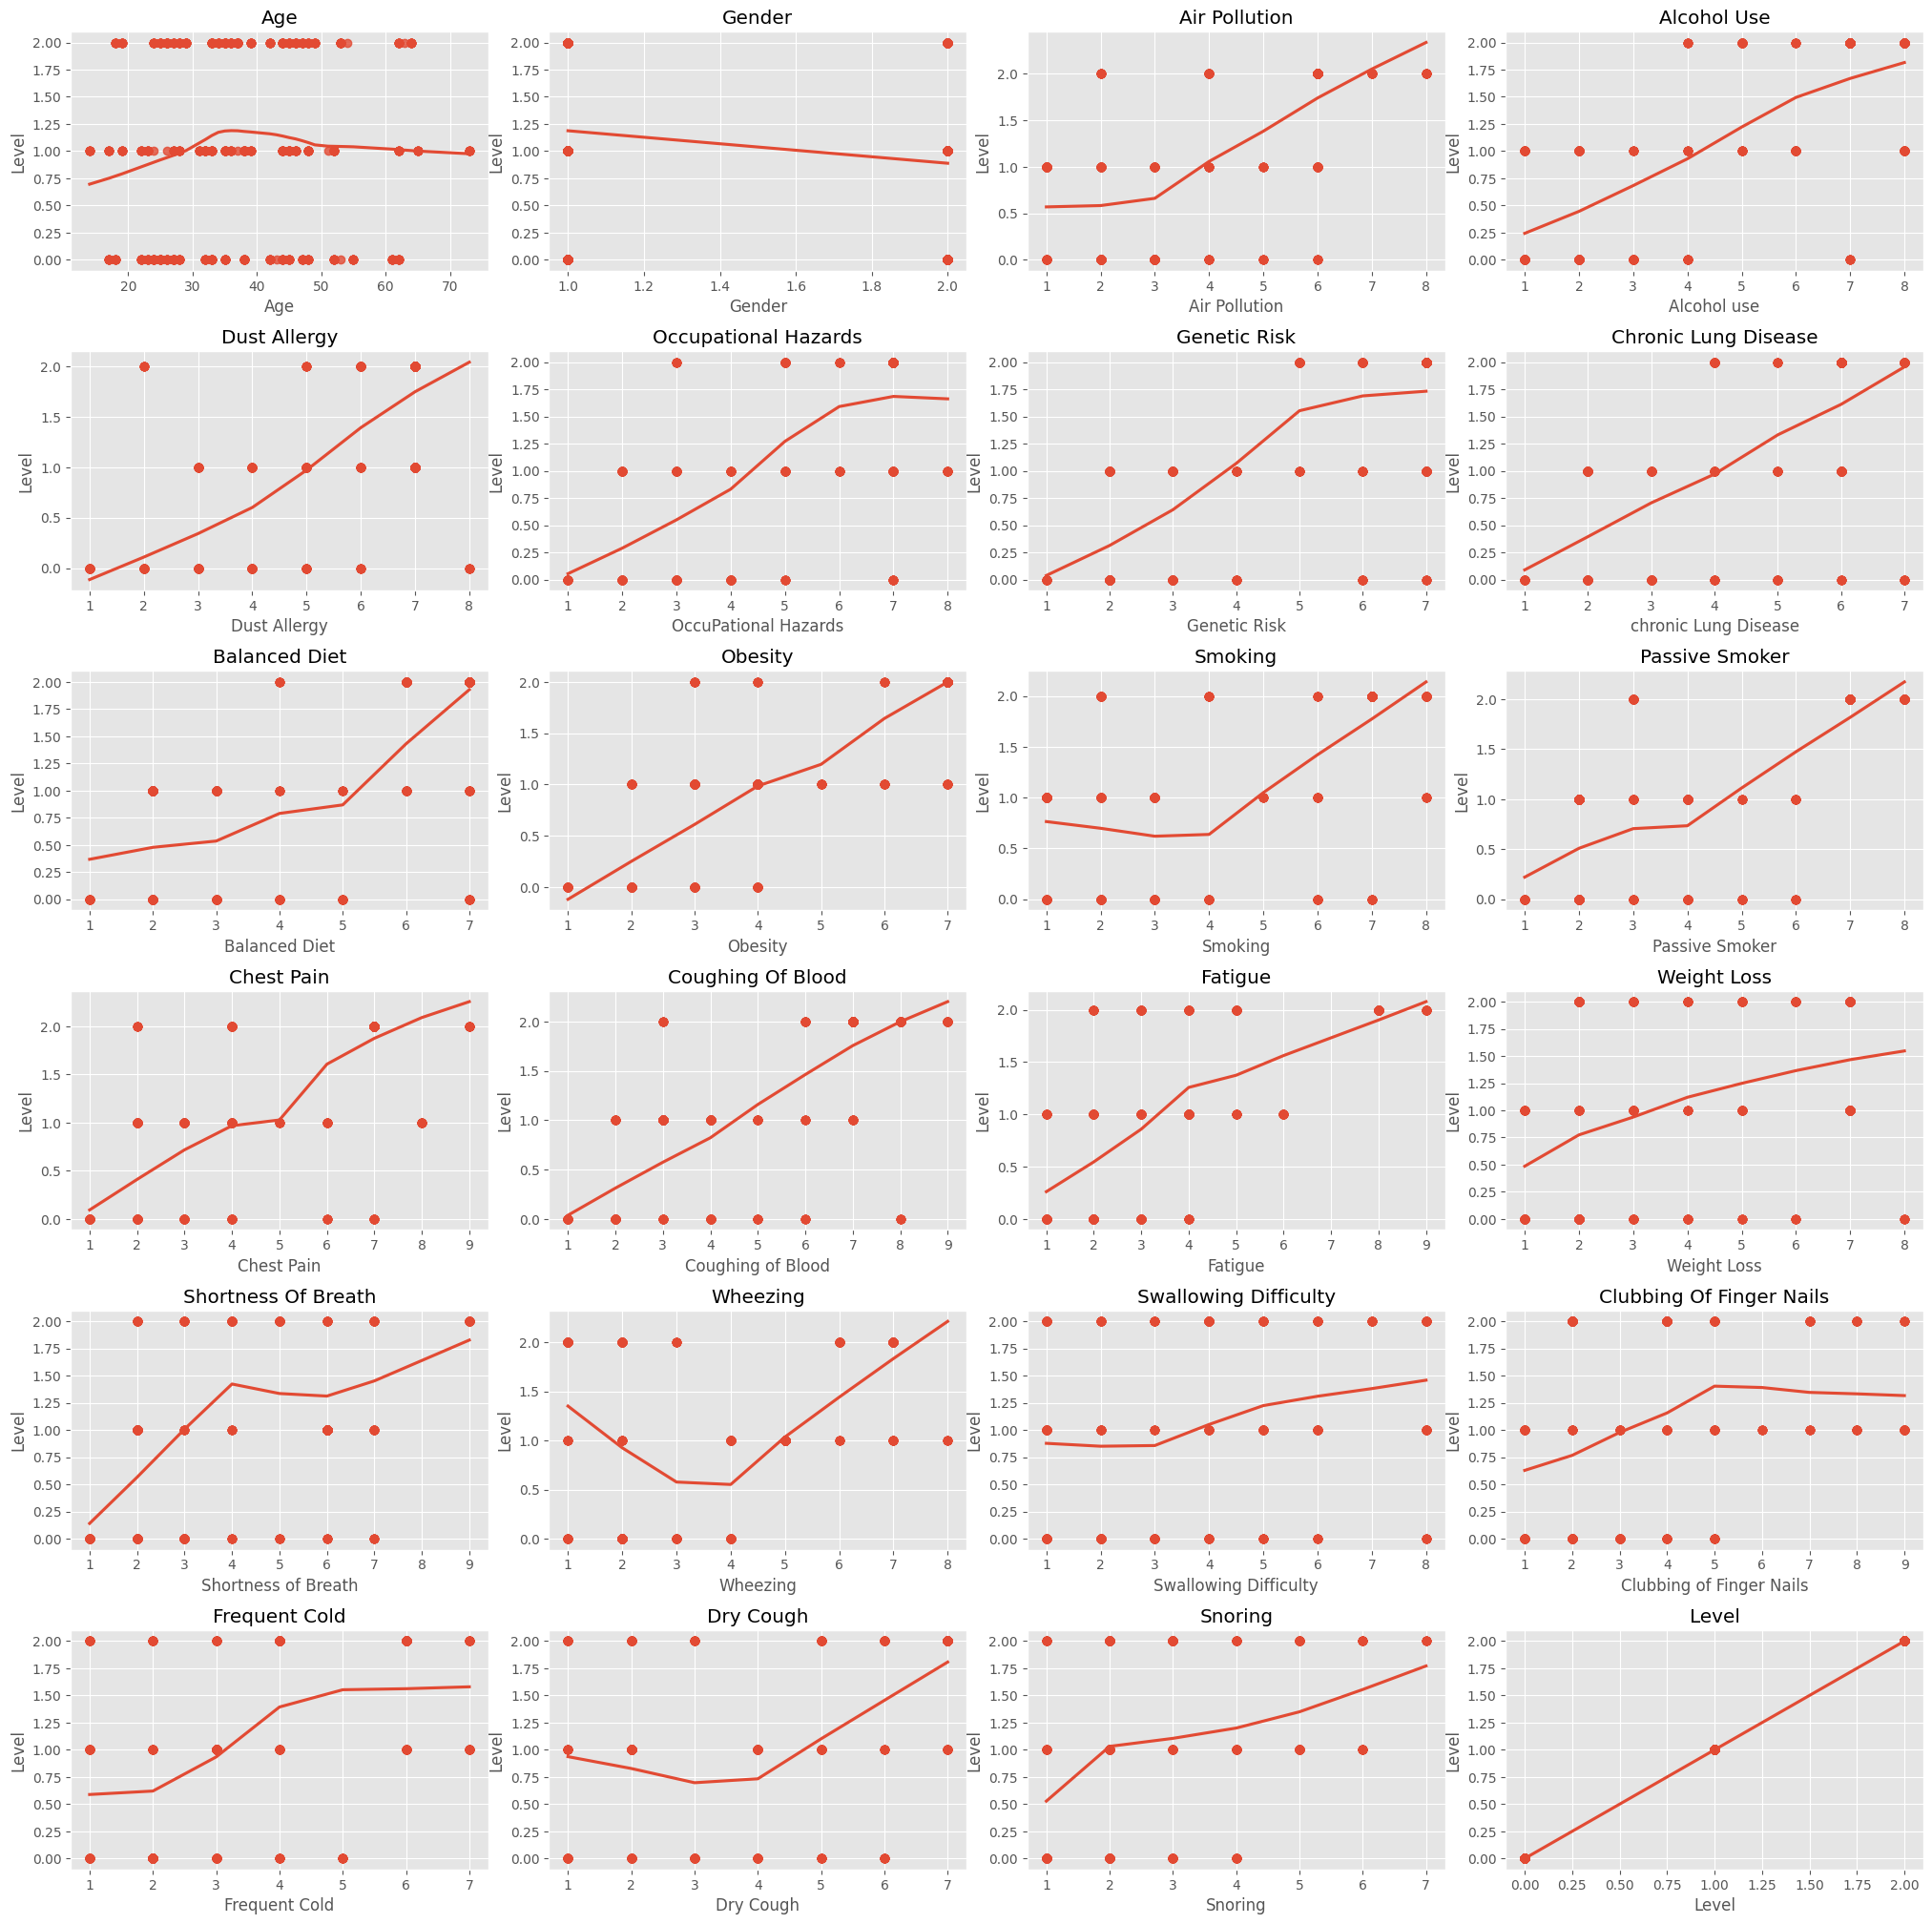

In [66]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.regplot(x=col, y='Level', data=df, lowess=True, ax=ax[i])
    ax[i].set_title(col.title())

plt.tight_layout(pad=0.1, w_pad=0.6, h_pad=1)
plt.show()

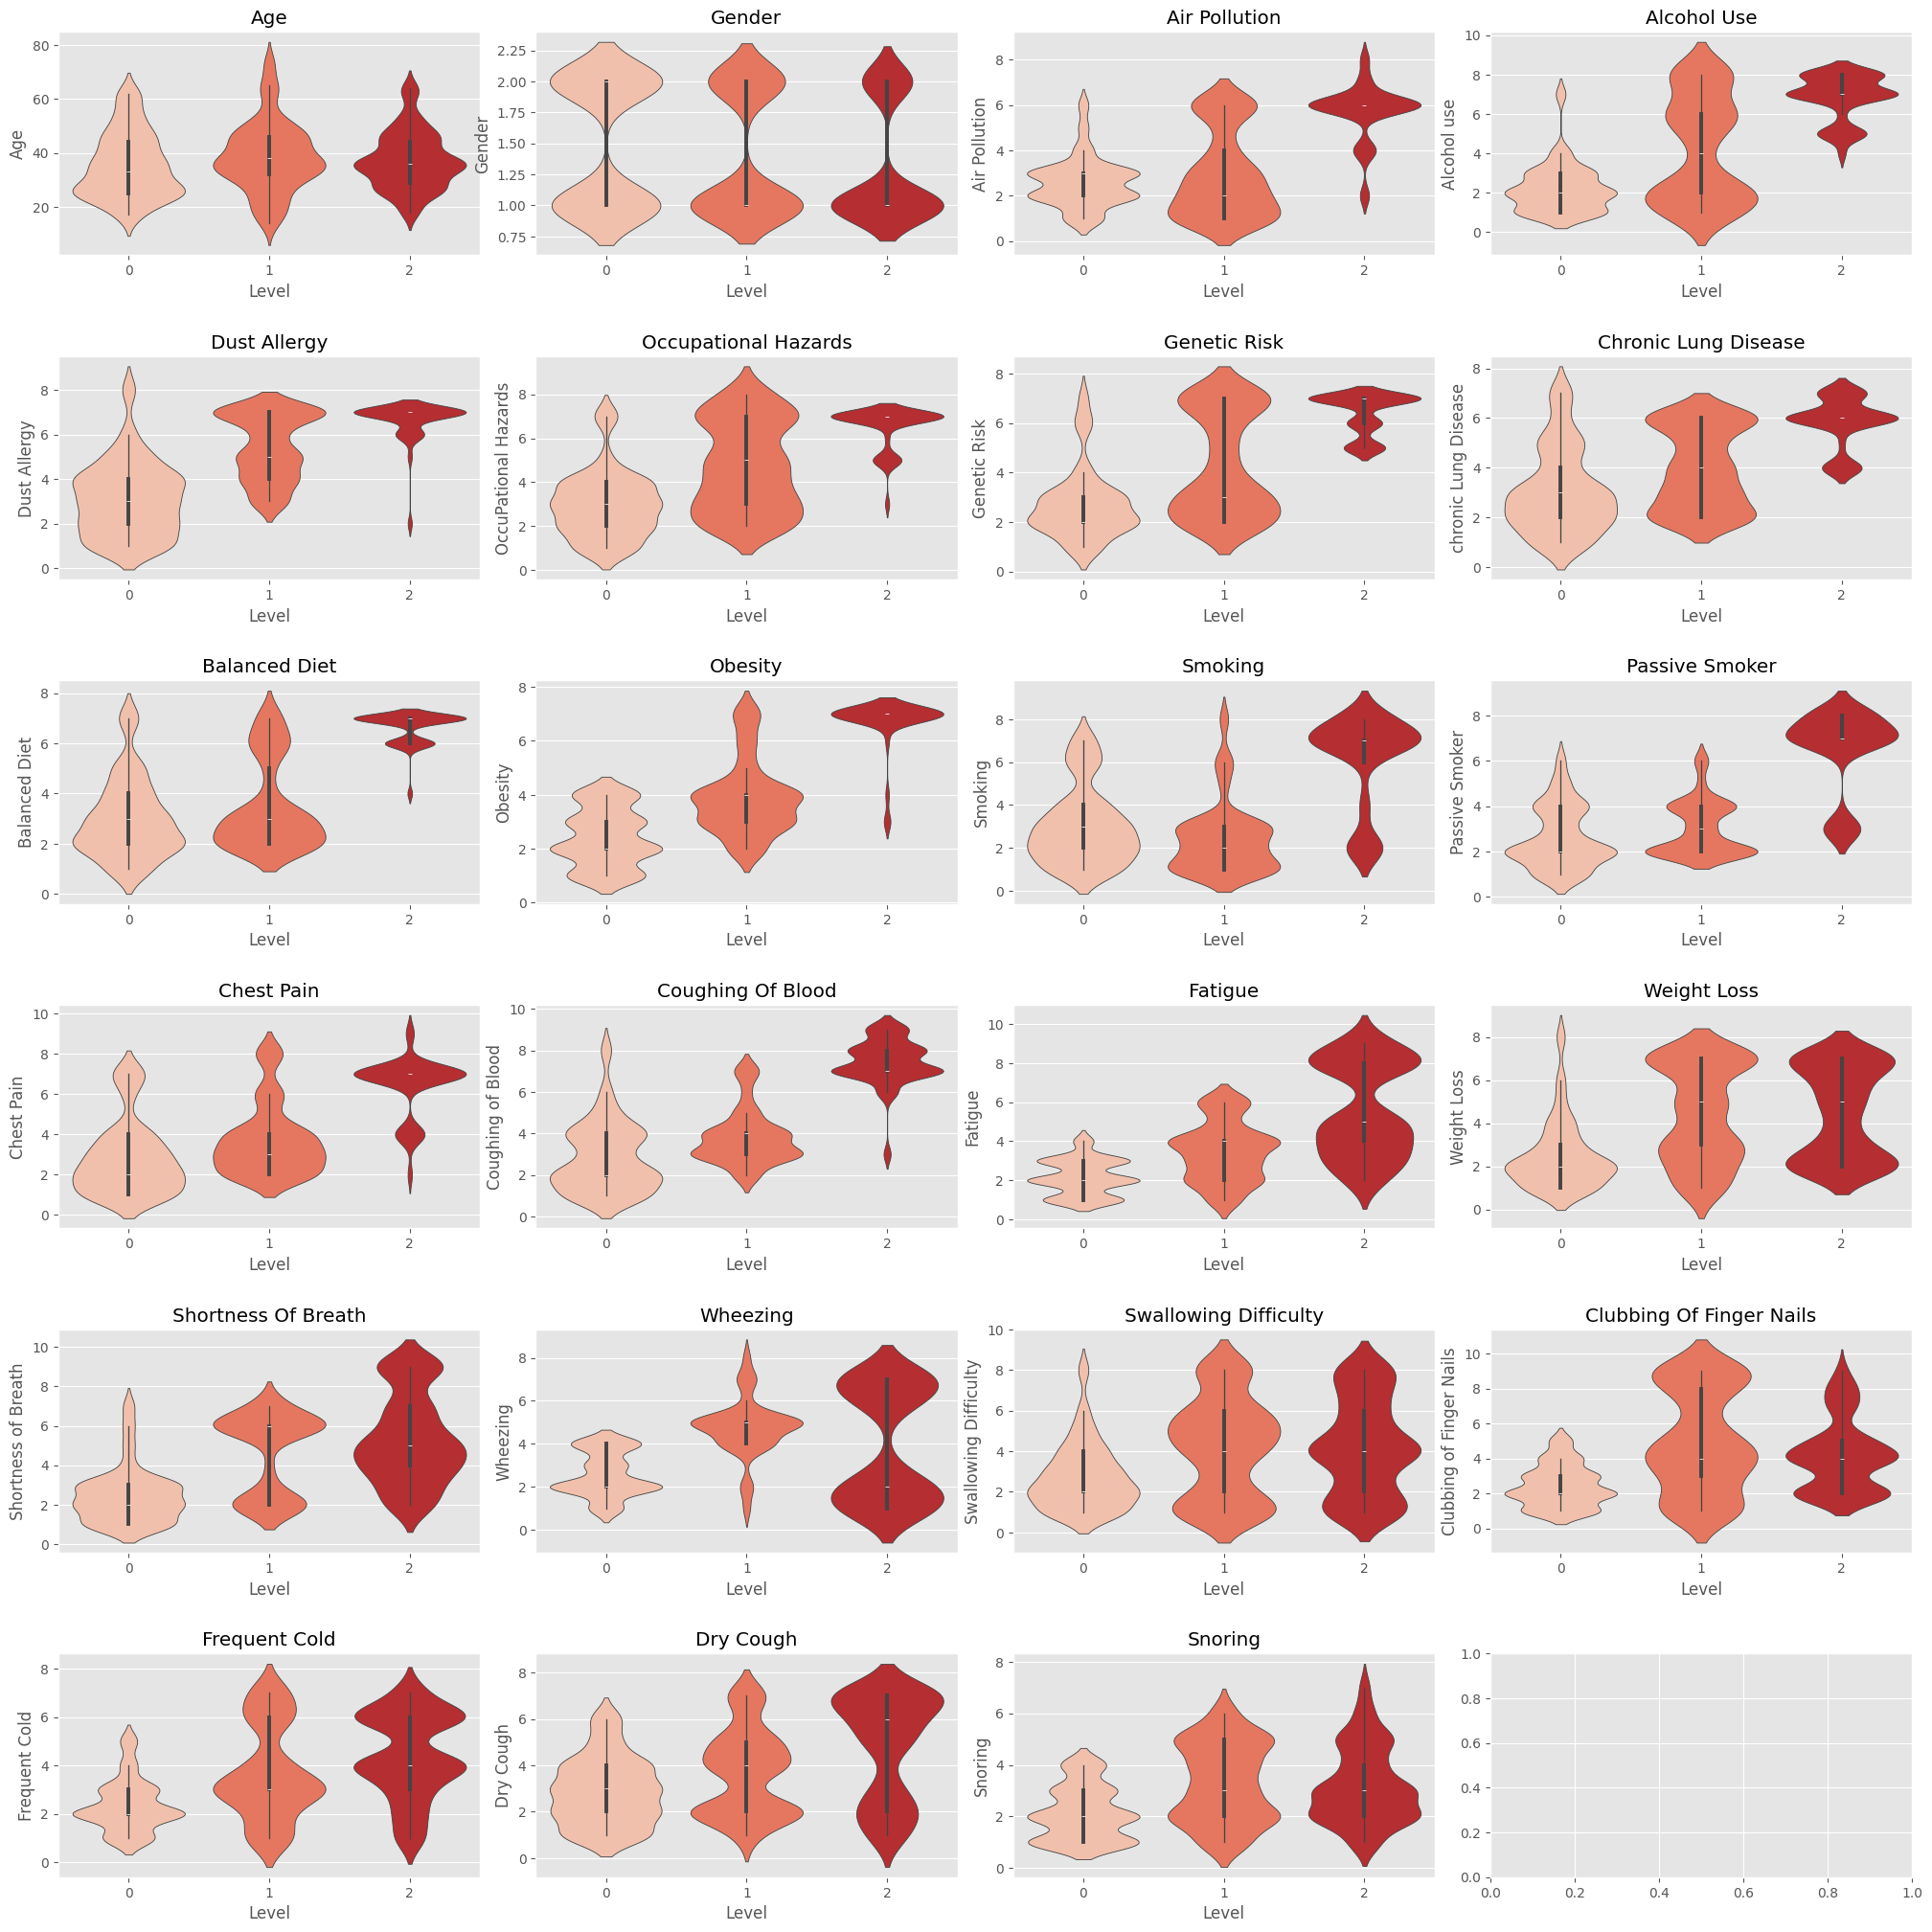

In [67]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

columns_to_plot = [col for col in df.columns if col != 'Level']

for i, col in enumerate(columns_to_plot):
    sns.violinplot(x=df['Level'],
                   y=df[col], data=df, hue_order=df['Level'].unique(), palette='Reds', ax=ax[i])
    ax[i].set_title(col.title())

plt.tight_layout(pad=0.1, w_pad=0.2, h_pad=2.5)
plt.show()

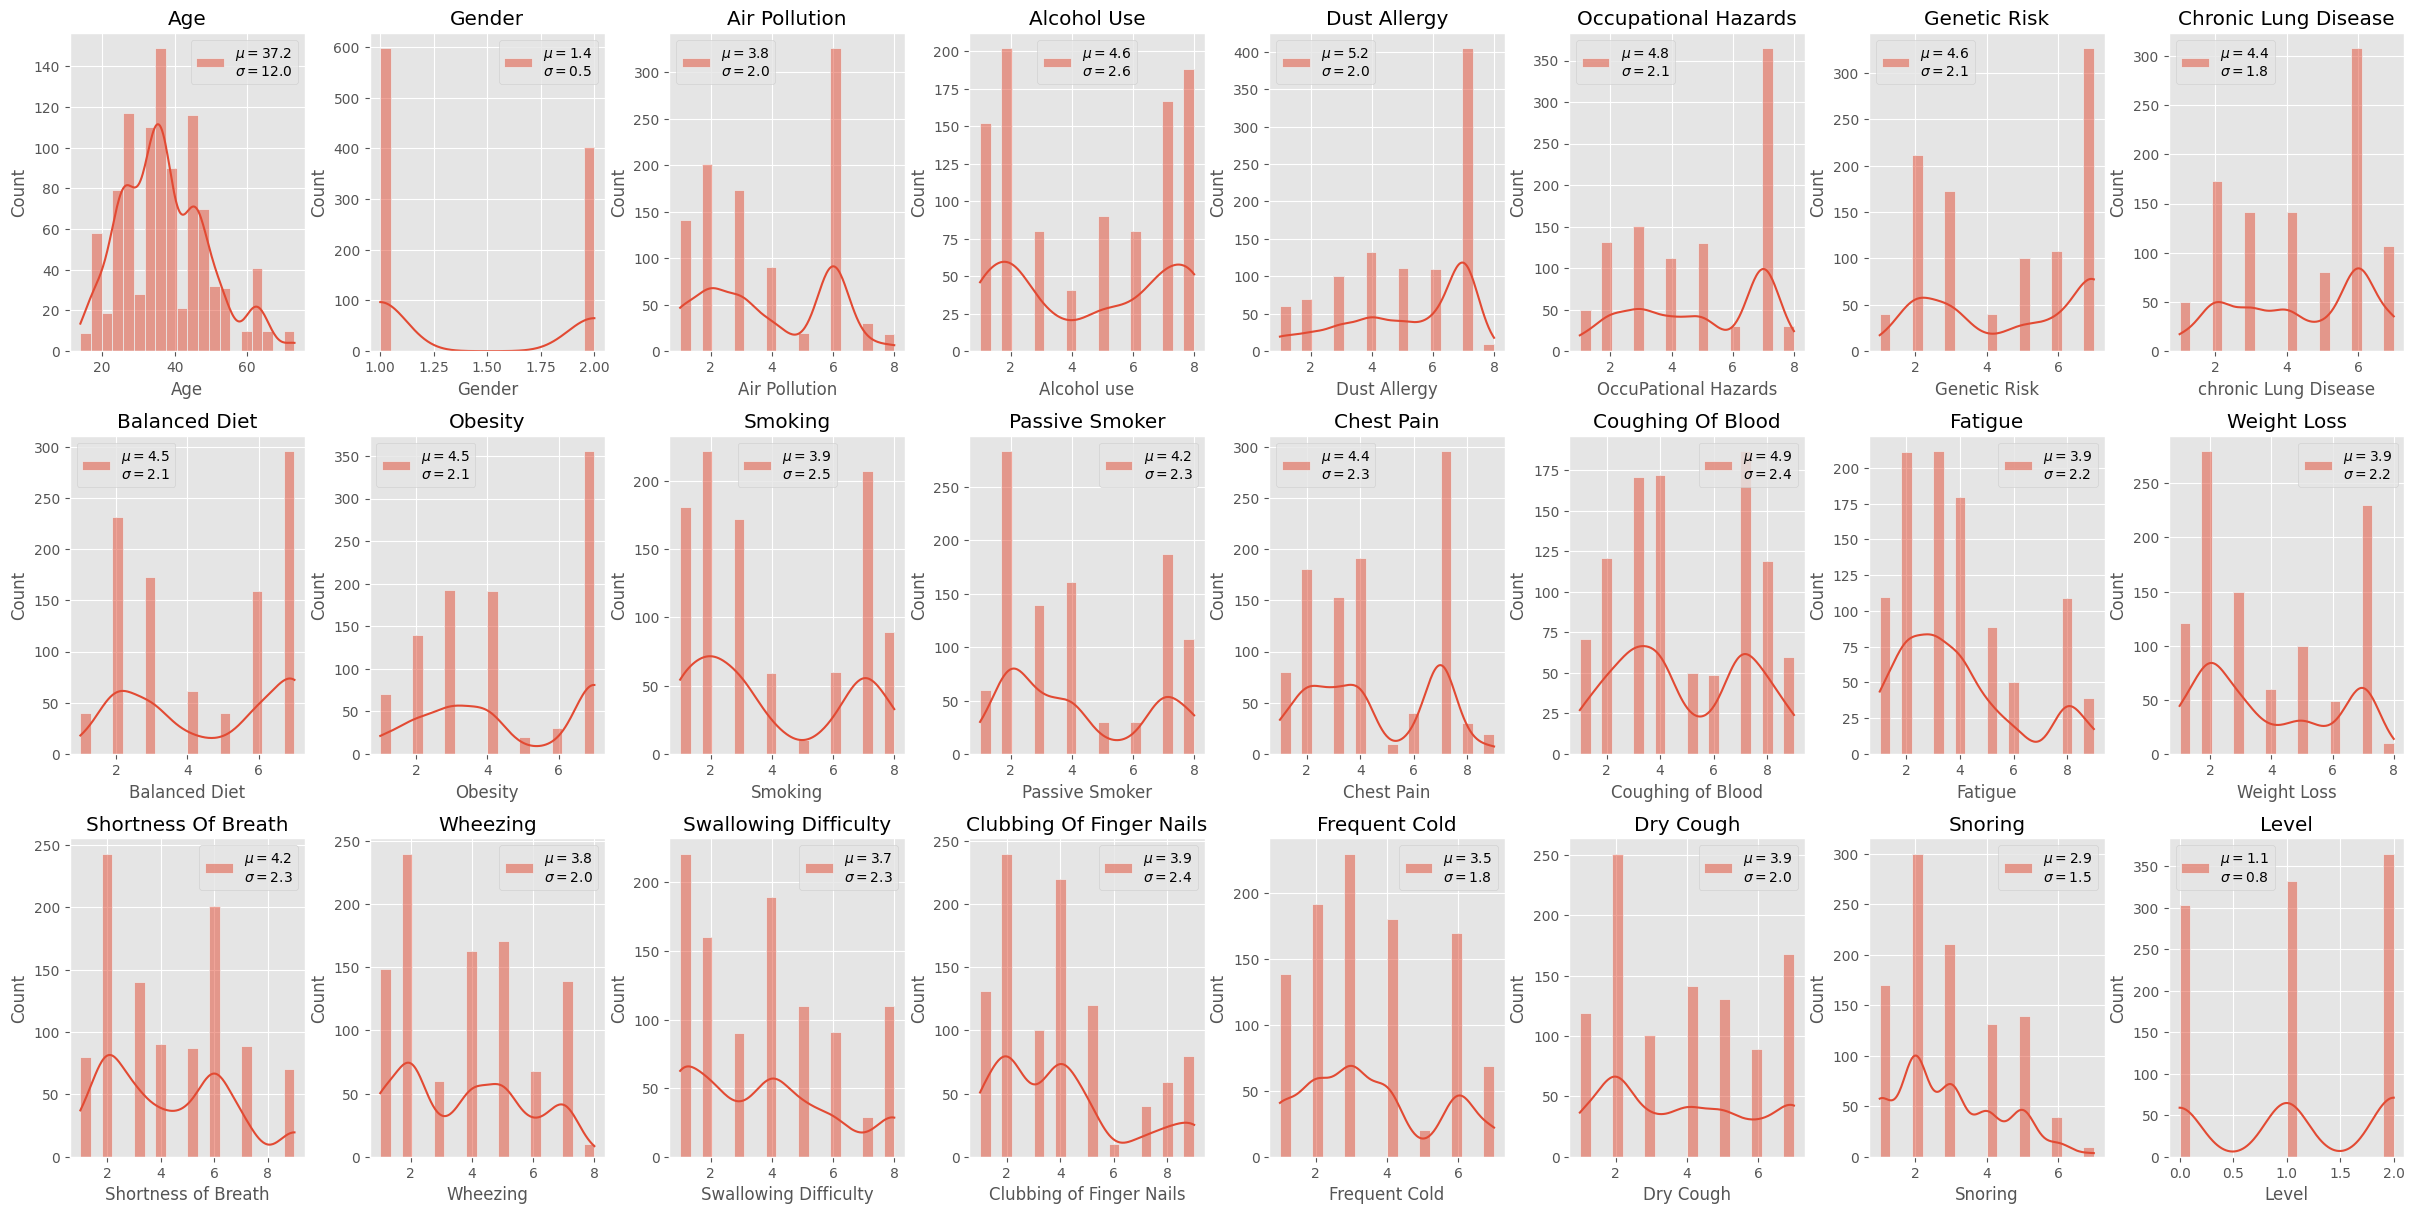

In [68]:
from scipy.stats import norm

fig, ax = plt.subplots(ncols=8, nrows=3, figsize=(24, 12))
ax = ax.flatten()

for i, (column_name, data) in enumerate(df.items()):
    mu, sigma = norm.fit(data)

    sns.histplot(data,
                 kde=True,
                 bins=20,
                 ax=ax[i],
                 label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')

    ax[i].set_title(column_name.title())
    ax[i].legend()

plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=1.0)
plt.show()

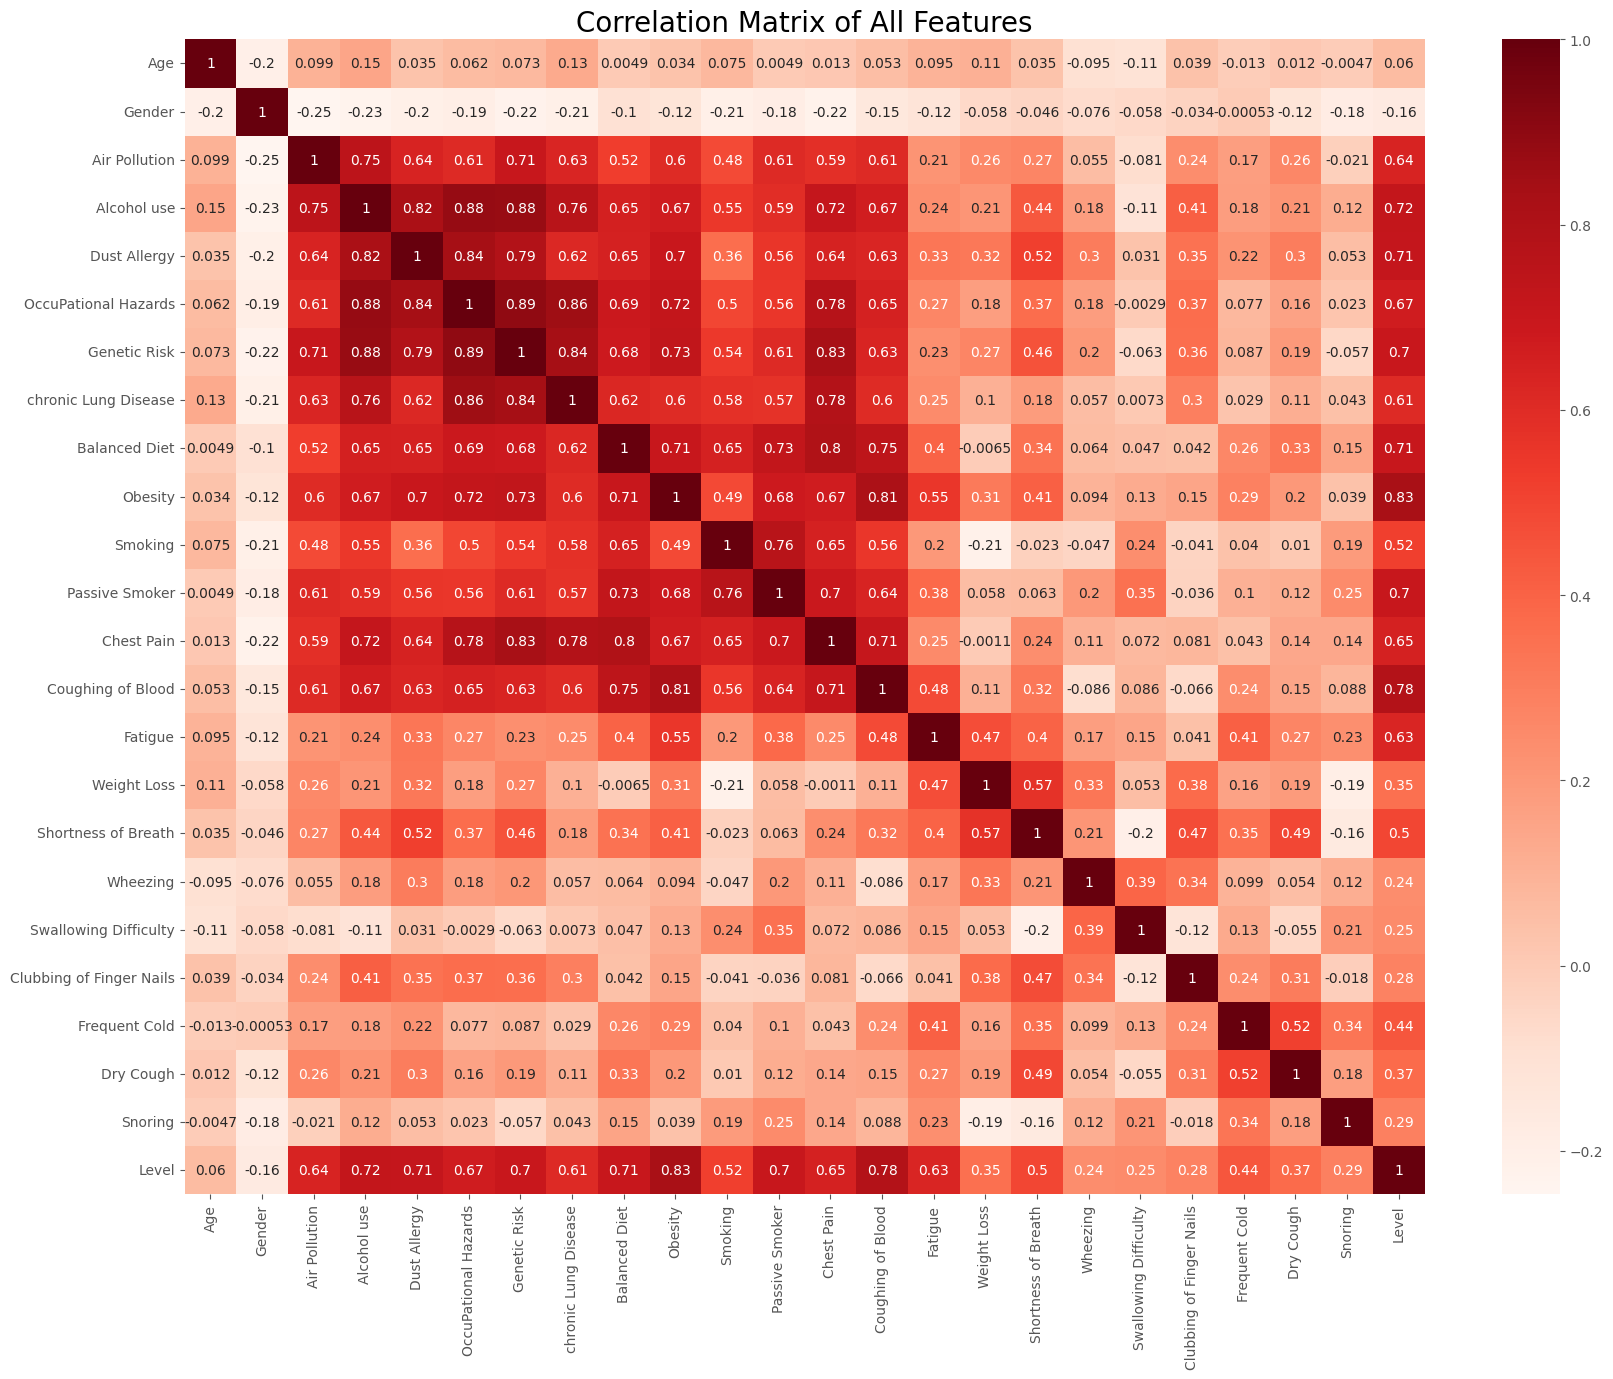

In [69]:
correlation_matrix = df.corr()

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.title('Correlation Matrix of All Features', size=20)
plt.show()

## Data Preparation

In [ ]:
X=df.drop('Level',axis=1)
y=df['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [ ]:
def models(X_train, y_train):

    y_train = y_train.values.ravel()

    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)

    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    gb = GradientBoostingClassifier()
    gb.fit(X_train, y_train)

    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    return lr, dt, rf, gb, knn

y_test = y_test.values.ravel()

lr, dt, rf, gb, knn = models(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)
y_pred_knn = knn.predict(X_test)

## Evaluation

In [ ]:
def evaluate_models(X_test, y_test, models):
    results = []
    for name, model in models.items():
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')

        results.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

    return pd.DataFrame(results)

models = {'Logistic Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, 'Gradient Boosting': gb, 'KNN': knn}

results_df = evaluate_models(X_test, y_test, models)

print(results_df)

                 Model  Accuracy  Precision    Recall
0  Logistic Regression     0.995   0.994792  0.993939
1        Decision Tree     1.000   1.000000  1.000000
2        Random Forest     1.000   1.000000  1.000000
3    Gradient Boosting     1.000   1.000000  1.000000
4                  KNN     0.995   0.994792  0.993939


## Hyperparameter Tuning

In [ ]:
folds = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [ ]:
def grid_search(model, folds, params, scoring):
    grid_search = GridSearchCV(model,
                               cv=folds,
                               param_grid=params,
                               scoring=scoring,
                               n_jobs=1,
                               verbose=1)
    return grid_search

In [ ]:
def print_best_score_params(model):
    print('Best Score: ', model.best_score_)
    print('Best Hyperparameters: ', model.best_params_)

### LR

In [ ]:
lr = LogisticRegression()
lr_params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
             'solver': ['liblinear', 'saga'],
             'C': [0.1, 1, 10],
             'l1_ratio': [0.5]}
grid_search_lr = grid_search(lr, folds, lr_params, scoring=None)

grid_search_lr.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10], 'l1_ratio': [0.5],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'saga']},
             verbose=1)

In [ ]:
print_best_score_params(grid_search_lr)

Best Score:  0.99875
Best Hyperparameters:  {'C': 10, 'l1_ratio': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
lr = LogisticRegression(C = 10, l1_ratio = 0.5, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)

lr_y_pred = lr.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, lr_y_pred))

Accuracy:  1.0


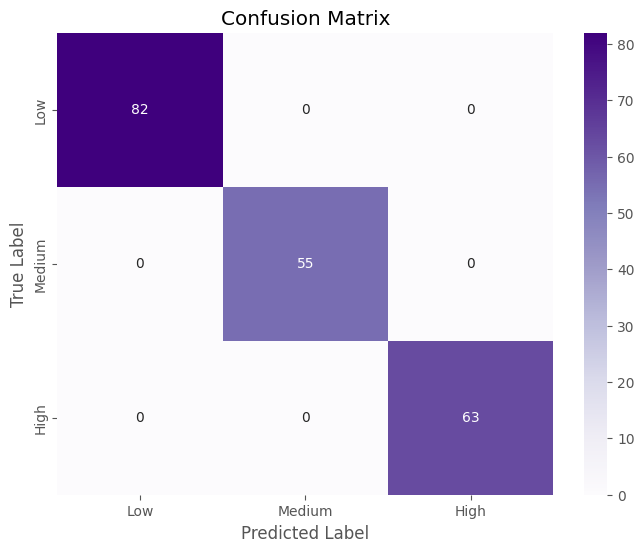

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
cm = confusion_matrix(y_test, lr_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, lr_y_pred))

### DT

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt_params = {
    'max_depth': [5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 30],
}
grid_search_dt = grid_search(dt, folds, dt_params, scoring='roc_auc_ovr')

grid_search_dt.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 30]},
             scoring='roc_auc_ovr', verbose=1)

In [ ]:
print_best_score_params(grid_search_dt)

Best Score:  0.999750952103867
Best Hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 5}


In [ ]:
dt = DecisionTreeClassifier(max_depth= 5, min_samples_leaf=5)
dt.fit(X_train, y_train)

dt_y_pred = dt.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, dt_y_pred))

Accuracy:  1.0


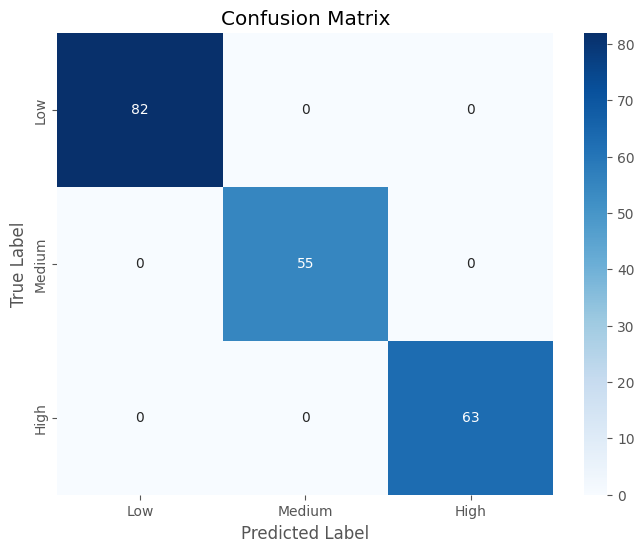

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
cm = confusion_matrix(y_test, dt_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, dt_y_pred))

### RF

In [ ]:
rf = RandomForestClassifier(random_state=123)

rf_params = {
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [15 ,20],
    'criterion' :['gini', 'entropy']
}
grid_search_rf = grid_search(rf, folds, rf_params, scoring='roc_auc_ovr')

y_train = y_train.values.ravel()

grid_search_rf.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=123), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='roc_auc_ovr', verbose=1)

In [ ]:
print_best_score_params(grid_search_rf)

Best Score:  1.0
Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
rf = RandomForestClassifier(
    criterion='gini',
    max_depth=15,
    max_features='sqrt',
    n_estimators=200
)
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, rf_y_pred))

Accuracy:  1.0


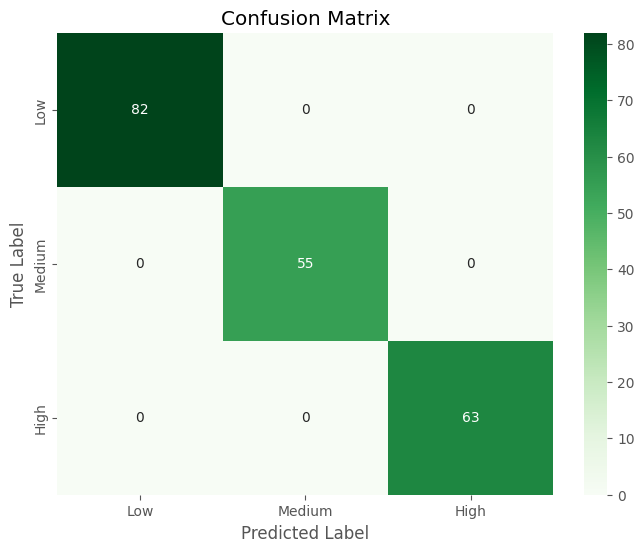

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
cm = confusion_matrix(y_test, rf_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, rf_y_pred))

### GB

In [ ]:
gb = GradientBoostingClassifier(random_state=123)

gb_params = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search_gb = grid_search(gb, folds, gb_params, scoring='accuracy')

grid_search_gb.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=123), n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
print_best_score_params(grid_search_gb)

Best Score:  1.0
Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
gb = GradientBoostingClassifier(
    learning_rate=0.01,
    max_depth=5,
    max_features='sqrt',
    n_estimators=200
)
gb.fit(X_train, y_train)

gb_y_pred = gb.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, gb_y_pred))

Accuracy:  1.0


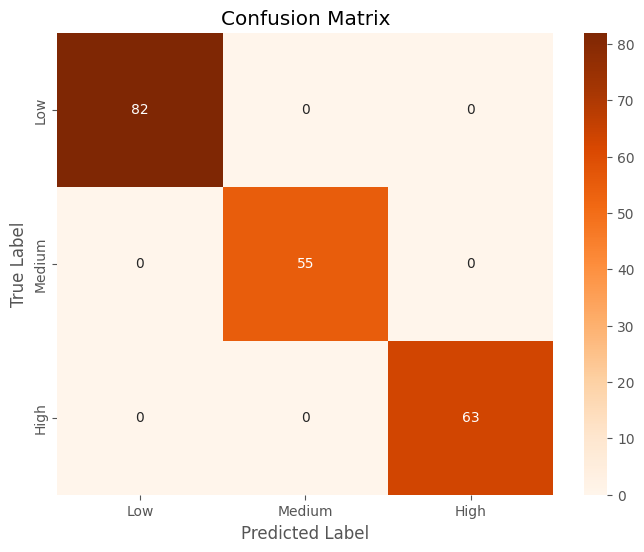

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
cm = confusion_matrix(y_test, gb_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, gb_y_pred))

### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8, weights='distance')
knn_params = {'n_neighbors' : [1,2,3,4,8,9,14,19,20,25],
              'weights' : ['uniform','distance'],
              'algorithm' : ['auto','ball_tree','kd_tree','brute']
}
grid_search_knn = GridSearchCV(knn, knn_params, cv = 10, scoring="accuracy")

grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=KNeighborsClassifier(n_neighbors=8, weights='distance'),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 8, 9, 14, 19, 20, 25],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print("Best score:",grid_search_knn.best_score_)
print("Best parameters:",grid_search_knn.best_estimator_)

Best score: 1.0
Best parameters: KNeighborsClassifier(n_neighbors=19, weights='distance')


In [ ]:
knn = KNeighborsClassifier(
    n_neighbors=19,
    weights='distance',
)
knn.fit(X_train, y_train)

knn_y_pred = knn.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, knn_y_pred))

Accuracy:  0.995


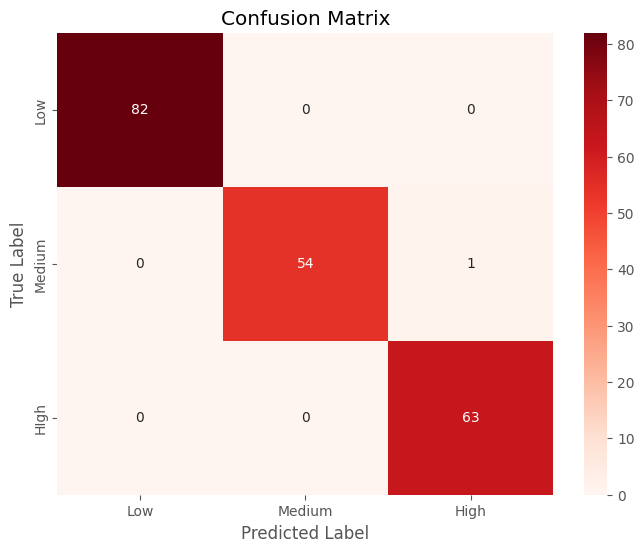

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      0.98      0.99        55
           2       0.98      1.00      0.99        63

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [ ]:
cm = confusion_matrix(y_test, knn_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'HIgh'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, knn_y_pred))